Sascha Spors,
Professorship Signal Theory and Digital Signal Processing,
Institute of Communications Engineering (INT),
Faculty of Computer Science and Electrical Engineering (IEF),
University of Rostock, Germany

Tutorial Digital Signal Processing (Course #24505),
**Jupyter notebook / `scipy` / `numpy` / `matplotlib` basics for DSP**,
Winter Semester 2019/20

Feel free to contact lecturer frank.schultz@uni-rostock.de

- lecture: https://github.com/spatialaudio/digital-signal-processing-lecture
- tutorial: https://github.com/spatialaudio/digital-signal-processing-exercises

You might find the following ressources useful:

- Python tutorial
https://nbviewer.jupyter.org/github/mgeier/python-audio/blob/master/intro-python.ipynb

- Python / Jupyter notebook tutorial
https://nbviewer.jupyter.org/github/spatialaudio/selected-topics-in-audio-signal-processing-exercises/blob/master/intro.ipynb

**Anaconda Environment**

If you are using the [Anaconda distribution](https://www.anaconda.com/distribution/) a convenient way to install a DSP specific environment from terminal is using

`conda create -n my_dsp python=3.7 pip numpy scipy sympy matplotlib notebook jupyterlab pydocstyle pycodestyle`

It asks Anaconda to look for the latest Python 3.7x and currently fitting versions of all the packages requested.
Then with
`conda activate my_dsp`
the environment is activated and Jupyter can be started with 
`jupyter notebook` ideally `cd` is already the folder you want to work in.

In [1]:
# most common used packages for DSP, have a look into outher scipy submodules
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import signal
from scipy import fftpack

# Matrix

In [2]:
A = np.array([[11, 12, 13], [21, 22, 23], [31, 32, 33], [41, 42, 43]])  # shape: (4, 3)

In [3]:
A = np.array([[11, 12, 13, 14], [21, 22, 23, 24], [31, 32, 33, 34], [41, 42, 43, 44]])  # shape (4, 4)

In [4]:
print(A)
print(A.shape)

[[11 12 13 14]
 [21 22 23 24]
 [31 32 33 34]
 [41 42 43 44]]
(4, 4)


In [5]:
B = A.T
print(B)
print(B.shape)

[[11 21 31 41]
 [12 22 32 42]
 [13 23 33 43]
 [14 24 34 44]]
(4, 4)


# Vector

In [6]:
print(A[:, 0])  # this is actually the first column (vector)
print(A[:, 0].shape)

[11 21 31 41]
(4,)


In [7]:
print(A[1, :])  # this is actually the second row (vector)
print(A[1, :].shape)

[21 22 23 24]
(4,)


Here, if we not assign the result to a variable, instead of returning a column vector (of e.g. shape: Nx1) or a row vector (of e.g. shape: 1xN), `numpy` returns a single dimension array, i.e. it collapses the array to 1D shape (N, ). This is in contrast to Matlab's handling of such array extractions.

We can enforce to interpret single dimensions `numpy` arrays as column or row matrices, if we need this for certain calculations. The idea is to put the array into a new array with 2 dimensions. We see that `numpy` by default assigns a row vector, the column vector needs additional transpose then.

In [8]:
c = np.array(A[:, 0], ndmin=2).T
r = np.array(A[1, :], ndmin=2)

print('column matrix:\n', c, 'with shape', c.shape)
print('row matrix:\n', r, 'with shape', r.shape)

column matrix:
 [[11]
 [21]
 [31]
 [41]] with shape (4, 1)
row matrix:
 [[21 22 23 24]] with shape (1, 4)


We can alternatively do this with 

In [9]:
c = np.row_stack((A[:,0]))
r = np.column_stack((A[1,:]))

print('column matrix:\n', c, 'with shape', c.shape)
print('row matrix:\n', r, 'with shape', r.shape)

column matrix:
 [[11]
 [21]
 [31]
 [41]] with shape (4, 1)
row matrix:
 [[21 22 23 24]] with shape (1, 4)


If we really need this, there is a short form to assign column and row matrices, such as

In [10]:
c = np.c_[0:4]
print('column matrix assigned with np.c_[]:\n', c, 'of shape', c.shape)

r = np.array(np.r_[0:4], ndmin=2)
print('row matrix assigned with np.r_[] and ndmin=2:\n', r, 'of shape', r.shape)

column matrix assigned with np.c_[]:
 [[0]
 [1]
 [2]
 [3]] of shape (4, 1)
row matrix assigned with np.r_[] and ndmin=2:
 [[0 1 2 3]] of shape (1, 4)


# Inner / Outer Product

If we leave `numpy`'s handling of single dimension arrays (giving up Matlab-related habits), we can perform outer and inner products as

In [11]:
# for (4,3)-matrix
A = np.array([[11, 12, 13], [21, 22, 23], [31, 32, 33], [41, 42, 43]])
c1 = A[:, 0]  # 1st col
c2 = A[:, 1]  # 2nd col
r2 = A[1, :]  # 2nd row
r3 = A[2, :]  # 2nd row
# we can do
print(np.outer(c1,r2))
print(np.outer(r2,c1))

print(np.inner(c1,c2))
print(np.inner(r2,r3))

[[231 242 253]
 [441 462 483]
 [651 682 713]
 [861 902 943]]
[[231 441 651 861]
 [242 462 682 902]
 [253 483 713 943]]
3308
2114


In [12]:
# for (4,4)-matrix
A = np.array([[11, 12, 13, 14], [21, 22, 23, 24], [31, 32, 33, 34], [41, 42, 43, 44]])
c1 = A[:, 0]  # 1st col
c2 = A[:, 1]  # 2nd col
r2 = A[1, :]  # 2nd row
r3 = A[2, :]  # 2nd row
# we can do
print(np.outer(c1,r2))
print(np.outer(r2,c1))

print(np.inner(c1,c2))
print(np.inner(r2,r3))
# and since dimension is ok further inner products:
print(np.inner(c1,r2))
print(np.inner(c1,r3))
print(np.inner(c2,r2))
print(np.inner(c2,r3))

[[231 242 253 264]
 [441 462 483 504]
 [651 682 713 744]
 [861 902 943 984]]
[[231 441 651 861]
 [242 462 682 902]
 [253 483 713 943]
 [264 504 744 984]]
3308
2930
2390
3430
2480
3560


So, what happens to the inner product when thinking the Matlab style. Let's check with a single dimension array (1D) and a single row matrix (2D).

In [13]:
a = np.array(np.arange(0,4))  # single dimension array, 1D, (4, )
print(a, a.shape)

b = np.array(np.arange(0,4), ndmin=2)  # single row matrix, 2D, (1, 4)
print(b, b.shape)

print(np.dot(a, a))  # returns a scalar

print(np.dot(b, b.T))  # returns 2D (1, 1) = matrix, needs row x columns handling
print(np.matmul(b, b.T))  # returns 2D (1, 1) = matrix, needs row x columns handling

[0 1 2 3] (4,)
[[0 1 2 3]] (1, 4)
14
[[14]]
[[14]]


# Matrix Multiplications, X = C D

cf. Gilbert Strang, https://ocw.mit.edu/courses/mathematics/18-06-linear-algebra-spring-2010/, lecture 3

In [14]:
C = np.array([[1, 2, 3], [4, 5, 6]])  # 2D (2, 3)
D = np.array([[7, 8], [9, 0], [1, 2]])  # 2D (3, 2)
# matrix multiplication C times D is 2D (2, 2)
print('C = ', C)
print('D = ', D)


C =  [[1 2 3]
 [4 5 6]]
D =  [[7 8]
 [9 0]
 [1 2]]


In [15]:
np.matmul(C, D)

array([[28, 14],
       [79, 44]])

In [16]:
C @ D
# nice to have this operator that conveniently indicates
# that we operate on matrices, vectors or thinking in numpy: on np.arrays

array([[28, 14],
       [79, 44]])

**but not (as in Matlab)!**

In [17]:
if False:
    C * D 
# using this operator overloading as Matlab does, just by inspecting this line
# of code you cannot tell what operation shall be performed,, you need to know
# what C and D is

## 1st Way: row x columns (inner product) to get values at individual indices

this is the least enlightening way so see how a matrix $\mathbf{C}$ acts on a vector or here on a matrix $\mathbf{D}$, but we probably all learned this first :-(

In [18]:
X = np.zeros((2, 2), dtype=int)  # assign variable for result, we expect integer, so assign it
for ri in range(0,2):
    for ci in range(0,2):
        X[ri, ci] = C[ri, :] @ D[:, ci]  # inner product = row of C x column of D
        #X[ri, ci] = np.dot(C[ri, :], D[:, ci])
X

array([[28, 14],
       [79, 44]])

## 2nd Way: matrix C x n-th column of D = n-th column of X

- n-th column of X is a linear combinations of columns of C, weights in n-th column of D

- here dimensions: (2, 3) x (3, 1) = (2, 1)

- useful mindset for the standard linear algebra problem $\mathbf{A} \mathbf{x} = \mathbf{b}$

In [19]:
np.array([C @ D[:,0], C @ D[:,1]]).T
# we need the transpose due to the above discussed characteristics
# on how numpy interprets resulting 1D arrays

array([[28, 14],
       [79, 44]])

## 3rd Way: n-th row of C x matrix D = n-th row of X

- n-th row of X is a linear combination of rows of D, weights in n-th row of C
- here dimensions: (1, 3) x (3, 2) = (1, 2)
- useful mindset when doing elimination, such as LU factorization or permutation of rows

In [20]:
np.squeeze(([C[0,:] @ D], [C[1,:] @ D]))  # stacked rows, nothing more to do here

array([[28, 14],
       [79, 44]])

## 4th Way: sum of (columns x rows) = sum of outer products
- useful mindset e.g. when C contains independent columns, D contains independent rows

In [21]:
np.outer(C[:,0], D[0,:]) + np.outer(C[:,1], D[1,:]) + np.outer(C[:,2], D[2,:]) 

array([[28, 14],
       [79, 44]])

# Complex Vectors and Inner Product

Let us extend the vector space to complex numbers with two vectors $\mathbf{x}_1$ and $\mathbf{x}_2$.

In [22]:
N = 32
OmegaN = 2*np.pi/N
k = np.arange(-N//2, N//2)
x1 = np.exp(-1j*OmegaN * k * 1) / np.sqrt(N)
x2 = np.exp(-1j*OmegaN * k * 2) / np.sqrt(N)

These are complex exponentials and due to the chosen parameters, periodic in $N$. In facts, these can be considered as DFT eigensignals for $N=32$, actually for $\mu=1$ and $\mu=2$.

Let's just plot these signals into one graph. The fastest way is to use `pyplot`, an API for `matplotlib`, it is similar to Matlab. `pyplot` is a good tool for quick'n dirty plots, whereas `matplotlib` gives you full access to any plotting objects, that's the professional way to plot. We leave it here with few simple calls of the `pyplot` API. 

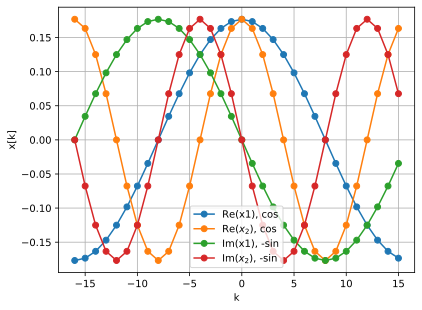

In [23]:
plt.plot(k, x1.real,'-o', color='C0', label='Re(x1), cos')
# C0, C1...C9 are matplotlib standard colors
# use them, its on purpose why using this blue, orange, green, red...
# plain rgb and cmyl colors are not longer favored for nice colored graphs
# due to perceptual reasons
plt.plot(k, np.real(x2),'-o', color='C1', label=r'Re($x_2$), cos')  # latex math using raw string

plt.plot(k, x1.imag,'-o', color='C2', label='Im(x1), -sin')
plt.plot(k, np.imag(x2),'-o', color='C3', label=r'Im($x_2$), -sin')  # latex math using raw string

plt.xlabel('k')
plt.ylabel('x[k]')

plt.legend()
plt.grid(True)

Back to vectors...

We should know that these vectors are orthonormal, so let us verify this with the **complex inner** product.

In [24]:
np.vdot(x1, x1)  # not exactly 1 due to numerical errors, even with double precision

(0.9999999999999998+0j)

In [25]:
np.dot(np.conj(x1), x1)

(0.9999999999999998+0j)

In [26]:
np.conj(x1) @ x1  # not recommended to do this with a matrix op

(0.9999999999999998+0j)

In [27]:
np.vdot(x2, x2)  # just always use the vdot()
# for real valued vectors this changes nothing,
# and for complex one this handling is failsafe

(0.9999999999999998+0j)

In [28]:
np.vdot(x1, x2)  # we expect 0

(1.4325993106686936e-17+7.864464752173903e-18j)

In [29]:
np.vdot(x2, x1)  # dot product is commutative, so this was actually not necessary

(1.4325993106686936e-17-7.864464752173903e-18j)

We get expected result for orthonormal vectors, besides numerical precision errors.

If you don't like complex signals / complex vector space that much, check it with plain unit amplitude cos() and sin() signals, periodic in $N$, where full periods fit into the signal length (= vector dimension).

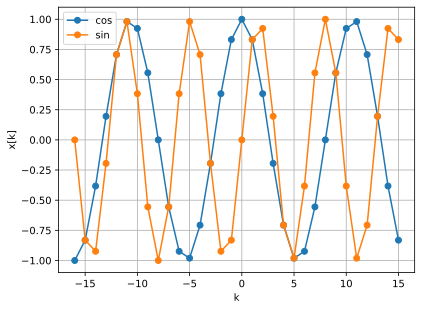

In [30]:
x3 = np.cos(OmegaN * k * 3)
x4 = np.sin(OmegaN * k * 5)

plt.plot(k,x3,'o-', label='cos')
plt.plot(k,x4,'o-', label='sin')
plt.xlabel('k')
plt.ylabel('x[k]')
plt.legend()
plt.grid(True)

In [31]:
np.vdot(x3, x3)  # max

15.999999999999996

In [32]:
np.vdot(x3, x4)  # 0

0.0

These vectors are orthogonal, but **not orthonormal**.

For real valued signals / vectors the **normal inner** product works as expected.

In [33]:
np.dot(x4,x4)

16.0

In [34]:
np.dot(x4,x3)

0.0

# Surface Plot

This is a simple example of a surface plot using
- `pcolormesh` called with the `matplotlib` API
- discrete valued colorbar based on `viridis` colormap. You might also check the `plasma`, `inferno`,`magma`,`cividis` colormaps for perceptually uniform sequential colormaps. If you need a diverging colormap (such as for nicely indicating positive and negative amplitudes of a waveform) `RdBu`, `seismic`, `bwr` (for non-red/blue colorblind people) do a good job. Colormaps like `jet` or `hsv` are not recommended, they do not match very well with our perception of the colorspace.

Text(0.5, 1.0, 'example plot')

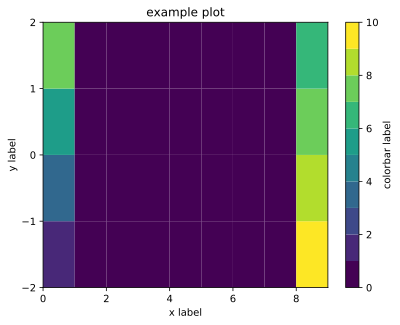

In [35]:
x = np.arange(0,10)
y = np.arange(-2,3)
z = np.zeros((4,10))
z[:,0] = np.arange(1,9,2)  # set up most left matrix column with simple entries
z[:,-2] = np.arange(9,5,-1) # set up most right  matrix column with other entries
col_tick = np.arange(0,11)  # intervals within colorbar and at the same time its ticks 
# do the plot job
cmap=plt.cm.viridis
norm = mpl.colors.BoundaryNorm(col_tick, cmap.N)
fig, ax = plt.subplots(1, 1)
c = ax.pcolormesh(x, y, z, cmap=cmap, norm=norm)
cbar = fig.colorbar(c, ax=ax, ticks=col_tick[::2], label='colorbar label')
ax.set_xlim(0,9)
ax.set_ylim(-2,2)
ax.set_xticks(np.arange(0,9,2))
ax.set_yticks(np.arange(-2,3))
ax.set_xlabel('x label')
ax.set_ylabel('y label')
ax.set_title('example plot')

## Subplots with matplotlib

Text(0.5, 1.0, 'sub 4')

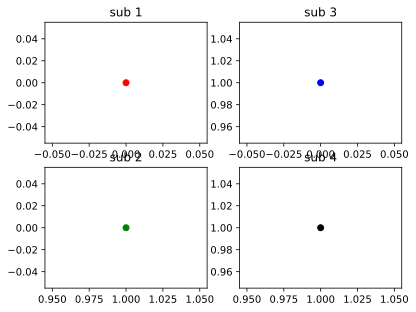

In [36]:
fig, ax = plt.subplots(2, 2)

ax[0,0].plot(0,0,'or')
ax[0,0].set_title('sub 1')

ax[1,0].plot(1,0,'og')
ax[1,0].set_title('sub 2')

ax[0,1].plot(0,1,'ob')
ax[0,1].set_title('sub 3')

ax[1,1].plot(1,1,'ok')
ax[1,1].set_title('sub 4')

## Subplots with pyplot

Text(0.5, 1.0, 'sub4')

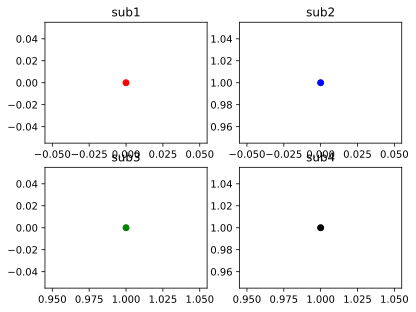

In [37]:
plt.subplot(2,2,1)
plt.plot(0,0,'or')
plt.title('sub1')

plt.subplot(2,2,3)
plt.plot(1,0,'og')
plt.title('sub3')

plt.subplot(2,2,2)
plt.plot(0,1,'ob')
plt.title('sub2')

plt.subplot(2,2,4)
plt.plot(1,1,'ok')
plt.title('sub4')

**Copyright**

The notebooks are provided as [Open Educational Resources](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebooks for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Frank Schultz, Digital Signal Processing - A Tutorial Featuring Computational Examples* with the URL https://github.com/spatialaudio/digital-signal-processing-exercises